In [1]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

**UPLOAD DATA CSV**

In [2]:
# Mount in Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepaths_Aurora = [f for f in os.listdir(".") if f.endswith('Aurora.csv')]
df_Aurora = pd.concat(map(pd.read_csv, filepaths_Aurora))
df_Aurora

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,-1.856445,0.765625,-1.966797,-157.25,9.00,237.5,1.0
1,-1.856445,0.765625,-1.966797,-157.25,9.00,237.5,1.0
2,-1.856445,0.765625,-1.966797,-157.25,9.00,237.5,1.0
3,-1.856445,0.765625,-1.966797,-157.25,9.00,237.5,1.0
4,-1.856445,0.765625,-1.966797,-157.25,9.00,237.5,1.0
...,...,...,...,...,...,...,...
395,-1.726562,1.011719,1.806641,240.50,247.25,246.0,1.0
396,-1.726562,1.011719,1.806641,240.50,247.25,246.0,1.0
397,-1.726562,1.011719,1.806641,240.50,247.25,246.0,1.0
398,-1.726562,1.011719,1.806641,240.50,247.25,246.0,1.0


In [4]:
filepaths_Letizia = [f for f in os.listdir(".") if f.startswith('Letizia')]
df_Letizia = pd.concat(map(pd.read_csv, filepaths_Letizia))
df_Letizia

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,1.265625,1.134766,1.371094,-140.000,0.0,108.500,0.0
1,1.265625,1.134766,1.371094,-140.000,0.0,108.500,0.0
2,1.265625,1.134766,1.371094,-140.000,0.0,108.500,0.0
3,1.292969,1.171875,1.412109,-143.125,0.0,108.750,0.0
4,1.292969,1.171875,1.412109,-143.125,0.0,108.750,0.0
...,...,...,...,...,...,...,...
395,1.505859,0.496094,1.472656,134.000,0.0,-161.375,1.0
396,1.505859,0.492188,1.460938,138.500,0.0,-158.500,1.0
397,1.505859,0.492188,1.460938,138.500,0.0,-158.500,1.0
398,1.505859,0.492188,1.460938,138.500,0.0,-158.500,1.0


In [5]:
filepaths_Natalia = [f for f in os.listdir(".") if f.endswith('Natalia.csv')]
df_Natalia = pd.concat(map(pd.read_csv, filepaths_Natalia))
df_Natalia

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,-1.376953,1.306641,1.921875,-220.875,108.75,189.50,0.0
1,-1.376953,1.306641,1.921875,-220.875,108.75,189.50,0.0
2,-1.376953,1.306641,1.921875,-220.875,108.75,189.50,0.0
3,-1.376953,1.306641,1.921875,-220.875,108.75,189.50,0.0
4,-1.376953,1.306641,1.921875,-224.750,113.00,185.00,0.0
...,...,...,...,...,...,...,...
395,-1.294922,1.947266,-1.188477,211.750,-132.50,231.00,2.0
396,-1.294922,1.947266,-1.188477,211.750,-132.50,231.00,2.0
397,-1.294922,1.947266,-1.188477,211.750,-132.50,231.00,2.0
398,-1.294922,1.947266,-1.188477,211.750,-132.50,231.00,2.0


In [6]:
filepaths_Adelaide = [f for f in os.listdir(".") if f.endswith('Adelaide.csv')]
df_Adelaide = pd.concat(map(pd.read_csv, filepaths_Adelaide))
df_Adelaide

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,-1.386719,0.937500,-1.781250,-65.875,120.75,-185.000,1.0
1,-1.386719,0.937500,-1.781250,-65.875,120.75,-185.000,1.0
2,-1.386719,0.937500,-1.781250,-65.875,120.75,-185.000,1.0
3,-1.386719,0.937500,-1.781250,-65.875,120.75,-185.000,1.0
4,-1.386719,0.937500,-1.781250,-65.875,120.75,-185.000,1.0
...,...,...,...,...,...,...,...
395,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875,0.0
396,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875,0.0
397,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875,0.0
398,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875,0.0


***CHECK FOR MEANINGFUL PATTERNS WITHIN RAW DATA (means)***

In [7]:
gb_auro = df_Aurora.groupby("label")
gb_leti = df_Letizia.groupby("label")
gb_nati = df_Natalia.groupby("label")
gb_ade = df_Adelaide.groupby("label")

ACQUISIZIONI AURORA

In [8]:
df_dritto_Aurora = gb_auro.get_group(0)
# Reset indexes
df_dritto_Aurora = df_dritto_Aurora.reset_index(drop=True)
# Replace infinite updated data with nan
df_dritto_Aurora.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_dritto_Aurora.dropna(inplace=True)
df_dritto_Aurora.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.0
mean,-0.955051,1.092683,-0.741072,8.826059,-21.981653,10.135240,0.0
std,1.316277,0.385551,1.492286,157.167288,174.900960,199.341398,0.0
min,-1.982422,0.000000,-2.000000,-250.000000,-249.875000,-250.000000,0.0
25%,-1.730469,0.835938,-1.772949,-141.125000,-182.750000,-201.875000,0.0
50%,-1.496094,1.154297,-1.492188,16.500000,-70.500000,108.500000,0.0
75%,-1.202148,1.388672,0.917969,143.750000,168.500000,207.000000,0.0
max,1.996094,1.937500,1.998047,249.500000,249.500000,249.750000,0.0


In [9]:
df_rovescio_Aurora = gb_auro.get_group(1)
# Reset indexes
df_rovescio_Aurora = df_rovescio_Aurora.reset_index(drop=True)
# Replace infinite updated data with nan
df_rovescio_Aurora.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_rovescio_Aurora.dropna(inplace=True)
df_rovescio_Aurora.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.00000,3970.000000,3970.0
mean,-0.767331,0.985539,0.419683,-13.667916,29.42711,0.322717,1.0
std,1.522874,0.517298,1.735072,185.041152,152.63873,210.639559,0.0
min,-2.000000,-1.976562,-1.999023,-249.625000,-249.87500,-249.875000,1.0
25%,-1.792969,0.822266,-1.752930,-194.250000,-73.62500,-220.375000,1.0
50%,-1.617188,1.080078,1.634766,-82.375000,42.50000,111.000000,1.0
75%,1.267578,1.248047,1.863281,198.187500,165.50000,213.250000,1.0
max,1.998047,1.968750,1.998047,249.250000,248.75000,249.500000,1.0


In [10]:
df_battuta_Aurora = gb_auro.get_group(2)
# Reset indexes
df_battuta_Aurora = df_battuta_Aurora.reset_index(drop=True)
# Replace infinite updated data with nan
df_battuta_Aurora.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_battuta_Aurora.dropna(inplace=True)
df_battuta_Aurora.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.0
mean,-0.669279,1.196400,-0.403847,-31.323875,-72.347236,11.326993,2.0
std,1.310118,1.086653,1.362758,184.781963,160.617783,197.353495,0.0
min,-1.997070,-2.000000,-1.988281,-250.000000,-249.000000,-249.000000,2.0
25%,-1.529297,1.203125,-1.325195,-206.750000,-202.375000,-198.500000,2.0
50%,-1.167969,1.576172,-1.099609,-132.125000,-143.500000,122.500000,2.0
75%,-0.842773,1.791016,1.349609,163.250000,64.250000,204.500000,2.0
max,1.998047,1.996094,1.996094,249.750000,247.750000,249.250000,2.0


ACQUISIZIONI LETIZIA

In [11]:
df_dritto_Letizia = gb_leti.get_group(0)
# Reset indexes
df_dritto_Letizia = df_dritto_Letizia.reset_index(drop=True)
# Replace infinite updated data with nan
df_dritto_Letizia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_dritto_Letizia.dropna(inplace=True)
df_dritto_Letizia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.0
mean,0.169582,0.949655,-0.182160,23.689721,-48.271537,17.579515,0.0
std,1.632111,0.414215,1.691100,203.680218,146.276121,189.378910,0.0
min,-1.998047,0.000000,-1.999023,-249.625000,-249.875000,-249.875000,0.0
25%,-1.771484,0.830078,-1.827148,-213.375000,-168.250000,-188.875000,0.0
50%,1.070312,0.980469,0.000000,106.500000,-86.750000,0.000000,0.0
75%,1.738281,1.250000,1.781250,222.000000,28.250000,204.250000,0.0
max,1.998047,1.960938,1.998047,249.500000,249.500000,249.500000,0.0


In [12]:
df_rovescio_Letizia = gb_leti.get_group(1)
# Reset indexes
df_rovescio_Letizia = df_rovescio_Letizia.reset_index(drop=True)
# Replace infinite updated data with nan
df_rovescio_Letizia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_rovescio_Letizia.dropna(inplace=True)
df_rovescio_Letizia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.0
mean,-0.075832,0.902637,0.816197,-10.234410,6.017095,-22.523714,1.0
std,1.638650,0.377860,1.445133,180.095726,121.281915,205.593201,0.0
min,-1.996094,0.000000,-1.998047,-249.500000,-249.875000,-249.875000,1.0
25%,-1.713867,0.757812,0.000000,-186.000000,-13.750000,-223.500000,1.0
50%,0.000000,1.003906,1.601562,0.000000,0.000000,-106.875000,1.0
75%,1.746094,1.160156,1.781250,176.000000,83.250000,222.250000,1.0
max,1.998047,1.533203,1.998047,248.000000,247.750000,249.750000,1.0


In [13]:
df_battuta_Letizia = gb_leti.get_group(2)
# Reset indexes
df_battuta_Letizia = df_battuta_Letizia.reset_index(drop=True)
# Replace infinite updated data with nan
df_battuta_Letizia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_battuta_Letizia.dropna(inplace=True)
df_battuta_Letizia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.0
mean,-1.164826,0.969739,-0.377402,-46.871488,-48.202741,16.290940,2.0
std,0.960580,1.318058,1.258700,171.495860,158.756632,184.948706,0.0
min,-1.999023,-1.998047,-1.991211,-249.625000,-249.500000,-249.875000,2.0
25%,-1.637695,1.226074,-1.313477,-188.000000,-182.500000,-190.000000,2.0
50%,-1.447266,1.486328,-0.959961,-124.625000,-113.875000,35.500000,2.0
75%,-1.205078,1.720703,1.056641,133.250000,87.000000,208.750000,2.0
max,1.994141,1.998047,1.994141,247.250000,249.500000,249.750000,2.0


ACQUISIZIONI NATALIA

In [14]:
df_dritto_Natalia = gb_nati.get_group(0)
# Reset indexes
df_dritto_Natalia = df_dritto_Natalia.reset_index(drop=True)
# Replace infinite updated data with nan
df_dritto_Natalia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_dritto_Natalia.dropna(inplace=True)
df_dritto_Natalia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.0
mean,-1.354076,1.190957,-0.218401,27.834404,-29.395870,-1.843194,0.0
std,0.514042,0.391009,1.784653,163.611217,162.093057,198.619518,0.0
min,-1.987305,-1.935547,-1.999023,-249.250000,-249.750000,-249.750000,0.0
25%,-1.591797,0.964844,-1.812500,-148.500000,-182.250000,-201.125000,0.0
50%,-1.417969,1.212891,-1.576172,87.750000,-72.125000,-98.000000,0.0
75%,-1.199219,1.433594,1.812500,171.000000,124.500000,203.500000,0.0
max,1.900391,1.867188,1.998047,246.750000,249.500000,248.750000,0.0


In [15]:
df_rovescio_Natalia = gb_nati.get_group(1)
# Reset indexes
df_rovescio_Natalia = df_rovescio_Natalia.reset_index(drop=True)
# Replace infinite updated data with nan
df_rovescio_Natalia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_rovescio_Natalia.dropna(inplace=True)
df_rovescio_Natalia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.0
mean,-1.470884,1.214832,1.167120,-43.456328,69.821476,13.228289,1.0
std,0.341146,0.246576,1.259400,177.436186,141.797426,217.065203,0.0
min,-1.981445,0.636719,-2.000000,-249.750000,-249.875000,-250.000000,1.0
25%,-1.679688,1.054688,1.527344,-193.000000,-36.500000,-218.125000,1.0
50%,-1.486328,1.152344,1.658203,-147.375000,129.000000,175.500000,1.0
75%,-1.276367,1.375000,1.761719,150.250000,184.500000,225.500000,1.0
max,1.972656,1.916016,1.998047,249.500000,248.000000,249.500000,1.0


In [16]:
df_battuta_Natalia = gb_nati.get_group(2)
# Reset indexes
df_battuta_Natalia = df_battuta_Natalia.reset_index(drop=True)
# Replace infinite updated data with nan
df_battuta_Natalia.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_battuta_Natalia.dropna(inplace=True)
df_battuta_Natalia.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.0
mean,-1.108621,-0.096122,-0.845989,15.540962,-98.487594,7.973997,2.0
std,0.666393,1.805466,1.175723,205.203208,179.503482,221.358082,0.0
min,-1.994141,-1.998047,-1.990234,-248.875000,-249.875000,-249.750000,2.0
25%,-1.371094,-1.838867,-1.528076,-200.500000,-223.406250,-221.000000,2.0
50%,-1.136719,-1.594727,-1.264648,158.250000,-198.250000,152.250000,2.0
75%,-1.001953,1.814453,-0.949219,211.750000,15.000000,230.500000,2.0
max,1.998047,1.998047,1.992188,249.750000,249.750000,248.750000,2.0


ACQUISIZIONI ADELAIDE

In [17]:
df_dritto_Adelaide = gb_ade.get_group(0)
# Reset indexes
df_dritto_Adelaide = df_dritto_Adelaide.reset_index(drop=True)
# Replace infinite updated data with nan
df_dritto_Adelaide.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_dritto_Adelaide.dropna(inplace=True)
df_dritto_Adelaide.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.0
mean,-0.971031,1.159266,-1.485142,65.442655,-55.213415,11.064662,0.0
std,1.317592,0.231849,0.656478,193.677914,162.875944,195.230063,0.0
min,-2.000000,0.421875,-2.000000,-250.000000,-249.500000,-249.625000,0.0
25%,-1.707031,1.027344,-1.744141,-173.875000,-190.500000,-206.750000,0.0
50%,-1.531250,1.203125,-1.585938,178.000000,-136.000000,-10.250000,0.0
75%,-1.262695,1.314453,-1.439453,215.000000,108.000000,201.000000,0.0
max,1.998047,1.660156,1.998047,249.750000,247.250000,249.500000,0.0


In [18]:
df_rovescio_Adelaide = gb_ade.get_group(1)
# Reset indexes
df_rovescio_Adelaide = df_rovescio_Adelaide.reset_index(drop=True)
# Replace infinite updated data with nan
df_rovescio_Adelaide.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_rovescio_Adelaide.dropna(inplace=True)
df_rovescio_Adelaide.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0
mean,-1.039340,1.109400,0.883181,-50.521969,50.477047,11.032469,1.0
std,1.253541,0.239416,1.421021,174.886349,130.869067,188.251046,0.0
min,-1.995117,0.347656,-1.997070,-250.000000,-249.625000,-249.750000,1.0
25%,-1.711914,0.964844,1.295898,-199.750000,-6.000000,-182.000000,1.0
50%,-1.491211,1.146484,1.548828,-142.500000,79.750000,-22.625000,1.0
75%,-1.316406,1.259766,1.730469,125.062500,165.250000,204.250000,1.0
max,1.994141,1.640625,1.998047,249.750000,249.250000,248.750000,1.0


In [19]:
df_battuta_Adelaide = gb_ade.get_group(2)
# Reset indexes
df_battuta_Adelaide = df_battuta_Adelaide.reset_index(drop=True)
# Replace infinite updated data with nan
df_battuta_Adelaide.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_battuta_Adelaide.dropna(inplace=True)
df_battuta_Adelaide.describe()

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.0
mean,-0.404122,0.997528,-0.348223,5.036274,-47.986887,51.709890,2.0
std,1.385615,1.431504,1.183783,209.046380,162.302172,193.718262,0.0
min,-1.958984,-2.000000,-1.996094,-250.000000,-249.875000,-250.000000,2.0
25%,-1.353516,1.207031,-1.205078,-215.000000,-181.250000,-167.250000,2.0
50%,-1.148438,1.667969,-0.916016,126.750000,-118.750000,172.750000,2.0
75%,1.363281,1.865234,1.009766,213.500000,103.000000,217.750000,2.0
max,1.982422,1.998047,1.988281,249.750000,249.750000,249.750000,2.0


**FULL ACQUISITIONS DATASET**

In [20]:
df_Adelaide = df_Adelaide.reset_index(drop=True)
df_Adelaide.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Adelaide.dropna(inplace=True)
df_Adelaide.shape

(11964, 7)

In [21]:
df_Aurora = df_Aurora.reset_index(drop=True)
df_Aurora.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Aurora.dropna(inplace=True)
df_Aurora.shape

(11914, 7)

In [22]:
df_Natalia = df_Natalia.reset_index(drop=True)
df_Natalia.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Natalia.dropna(inplace=True)
df_Natalia.shape

(11969, 7)

In [23]:
df_Letizia = df_Letizia.reset_index(drop=True)
df_Letizia.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Letizia.dropna(inplace=True)
df_Letizia.shape

(11938, 7)

In [24]:
df_all = pd.concat([df_Aurora, df_Natalia,df_Letizia, df_Adelaide] , axis= 0)
df_all = df_all.reset_index(drop=True)
df_all.shape

(47785, 7)

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47785 entries, 0 to 47784
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACC_X   47785 non-null  float64
 1   ACC_Y   47785 non-null  float64
 2   ACC_Z   47785 non-null  float64
 3   GYR_X   47785 non-null  float64
 4   GYR_Y   47785 non-null  float64
 5   GYR_Z   47785 non-null  float64
 6   label   47785 non-null  float64
dtypes: float64(7)
memory usage: 2.6 MB


**SPLITTING DATASET**

In [26]:
# TARGET VARIABLE = TYPE OF SHOT
y = df_all["label"]
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
47780    0.0
47781    0.0
47782    0.0
47783    0.0
47784    0.0
Name: label, Length: 47785, dtype: float64

In [27]:
# EXPLANATORY VARIABLES = GYROSCOPE &  ACCELEROMETER MEASURES
X = df_all.drop("label", axis=1) 
X

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z
0,-1.856445,0.765625,-1.966797,-157.250,9.00,237.500
1,-1.856445,0.765625,-1.966797,-157.250,9.00,237.500
2,-1.856445,0.765625,-1.966797,-157.250,9.00,237.500
3,-1.856445,0.765625,-1.966797,-157.250,9.00,237.500
4,-1.856445,0.765625,-1.966797,-157.250,9.00,237.500
...,...,...,...,...,...,...
47780,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875
47781,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875
47782,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875
47783,-1.685547,1.488281,-1.484375,-215.125,172.25,-208.875


**TRAIN & TEST**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   #We are taking a test size of 25% and a train size of 75%
                                                    stratify=y,        #in order to preserve target propotions.
                                                    random_state= 123) #fix random seed for replicability
print(X_train.shape, X_test.shape)

(33449, 6) (14336, 6)


**MULTICLASS CLASSIFICATION PROBLEM**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics, datasets
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import math

In [30]:
# Function which reports which are the best hyperparameters for a classifier using Grid Search

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1_micro', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred, average = 'micro'))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [50]:
# Function which shows the confusion matrix which of the trained classifier

def cnf_matrix_multinomial(model,X_train,y_train,X_test,y_test):
    #fit the classifier
    chosen_classifier = model.fit(X_train, y_train)
    #predicted labels
    y_pred = model.predict(X_test)
    #build confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(cnf_matrix)   
    #show confusion matrix
    disp = plot_confusion_matrix(chosen_classifier, X_test, y_test,
                                 display_labels=["dirtto", "rovescio", "battuta"],
                                 cmap=plt.cm  .Blues)
    plt.title('Confusion matrix of the 3-classes supervised problem')
    plt.show()

* DECISION TREE

In [33]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [5,10,15,20],
              'min_samples_split': [10,15,20],
              'min_samples_leaf': [8,10]}

hyperp_search(classifier,parameters)

f1_train: 0.965709 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 10}
f1_test:  0.9709821428571429
[[4670   77   23]
 [ 294 4485    5]
 [   9    8 4765]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      4770
         1.0       0.98      0.94      0.96      4784
         2.0       0.99      1.00      1.00      4782

    accuracy                           0.97     14336
   macro avg       0.97      0.97      0.97     14336
weighted avg       0.97      0.97      0.97     14336

CPU times: user 788 ms, sys: 60.6 ms, total: 849 ms
Wall time: 8.47 s


In [34]:
#best model according to GridSearch
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15  , min_samples_leaf =8, min_samples_split = 10)

[[4673   71   26]
 [ 286 4493    5]
 [   9    9 4764]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


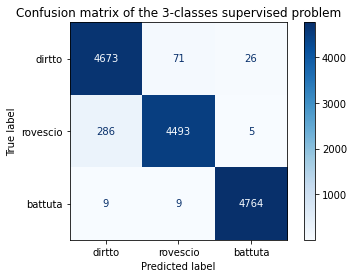

In [51]:
#confusion matrix
cnf_matrix_multinomial(model_tree,X_train,y_train,X_test,y_test)

* LOGISTIC REGRESSION

In [36]:
%%time 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], 
              "max_iter":[1000, 2000]}

hyperp_search(classifier,parameters)

f1_train: 0.564770 using {'C': 1, 'max_iter': 1000}
f1_test:  0.5583147321428571
[[2590 1364  816]
 [ 970 3371  443]
 [1841  898 2043]]
              precision    recall  f1-score   support

         0.0       0.48      0.54      0.51      4770
         1.0       0.60      0.70      0.65      4784
         2.0       0.62      0.43      0.51      4782

    accuracy                           0.56     14336
   macro avg       0.57      0.56      0.55     14336
weighted avg       0.57      0.56      0.55     14336

CPU times: user 5.72 s, sys: 3.94 s, total: 9.66 s
Wall time: 1min 8s


In [37]:
#best model according to GridSearch
model_lr = LogisticRegression(C=1, max_iter=1000)

[[2590 1364  816]
 [ 970 3371  443]
 [1841  898 2043]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


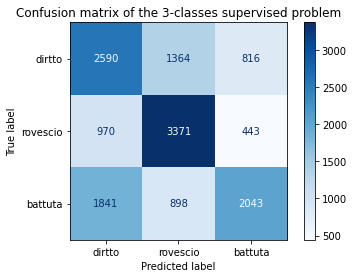

In [52]:
#confusion matrix
cnf_matrix_multinomial(model_lr,X_train,y_train,X_test,y_test)

* SVM

In [42]:
%%time
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], 
              "C":[0.1,10,100]}

hyperp_search(classifier,parameters)

KeyboardInterrupt: ignored

In [ ]:
#best model according to GridSearch
#model_svm = SVC(C=100, kernel='rbf', probability=True)

* KNN

In [39]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100,500)}

hyperp_search(classifier,parameters)

f1_train: 0.940775 using {'n_neighbors': 10}
f1_test:  0.9717494419642857
[[4710   15   45]
 [ 152 4582   50]
 [  80   63 4639]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4770
         1.0       0.98      0.96      0.97      4784
         2.0       0.98      0.97      0.97      4782

    accuracy                           0.97     14336
   macro avg       0.97      0.97      0.97     14336
weighted avg       0.97      0.97      0.97     14336

CPU times: user 652 ms, sys: 101 ms, total: 752 ms
Wall time: 3.07 s


In [40]:
#best model according to GridSearch
model_knn = KNeighborsClassifier(n_neighbors = 10)

[[4710   15   45]
 [ 152 4582   50]
 [  80   63 4639]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


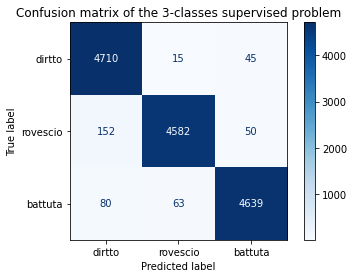

In [53]:
#confusion matrix
cnf_matrix_multinomial(model_knn,X_train,y_train,X_test,y_test)

* RANDOM FOREST 

In [60]:
%%time
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {'n_estimators':[10,20,30],
              'criterion':['entropy', 'gini'],
              'max_depth':[5,10,15], 
              'min_samples_split' : [3,5],
              'min_samples_leaf' :[2,5]
              }

hyperp_search(classifier,parameters)


f1_train: 0.990613 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}
f1_test:  0.9916294642857143
[[4765    3    2]
 [ 112 4672    0]
 [   3    0 4779]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4770
         1.0       1.00      0.98      0.99      4784
         2.0       1.00      1.00      1.00      4782

    accuracy                           0.99     14336
   macro avg       0.99      0.99      0.99     14336
weighted avg       0.99      0.99      0.99     14336

CPU times: user 3.82 s, sys: 279 ms, total: 4.1 s
Wall time: 1min 35s


In [61]:
#best model according to GridSearch
model_rf = RandomForestClassifier(n_estimators=30, 
                                  criterion='entropy', 
                                  max_depth=15, 
                                  min_samples_split=5, 
                                  min_samples_leaf=2)

[[4765    3    2]
 [ 113 4671    0]
 [   3    0 4779]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


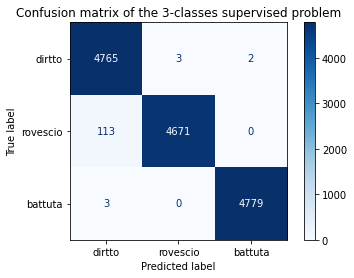

In [63]:
#confusion matrix
cnf_matrix_multinomial(model_rf,X_train,y_train,X_test,y_test)

**MAKING PREDICTIONS** --> RANDOM FOREST

In [84]:
filepaths_pred_Letizia = [f for f in os.listdir(".") if f.endswith('LETIZIANOLABEL_DRITTO.csv')]
df_pred_Letizia = pd.concat(map(pd.read_csv, filepaths_pred_Letizia))
df_pred_Letizia

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z
0,1.6500,0.8223,1.699,-170.0,31.75,135.5
1,1.6500,0.8223,1.699,-170.0,31.75,135.5
2,1.6500,0.8223,1.699,-170.0,31.75,135.5
3,1.6500,0.8223,1.699,-170.0,31.75,135.5
4,1.6500,0.8223,1.699,-170.0,31.75,135.5
...,...,...,...,...,...,...
395,1.4650,0.8086,-1.833,220.5,-41.25,-196.5
396,1.4375,0.8184,-1.830,220.5,-39.62,-200.6
397,1.4375,0.8184,-1.830,220.5,-39.62,-200.6
398,1.4375,0.8184,-1.830,220.5,-39.62,-200.6


In [85]:
df_pred_Letizia.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pred_Letizia.dropna(inplace=True)
df_pred_Letizia = df_pred_Letizia.reset_index(drop=True)
df_pred_Letizia.shape

(1991, 6)

In [86]:
# EXPLANATORY VARIABLES
X2 = df_pred_Letizia

In [87]:
# TARGET PREDICTED with RANDOM FOREST
y2_pred = model_rf.predict(X2)

In [88]:
y2_pred_col = pd.DataFrame(y2_pred)

In [89]:
# file with predictions
pred_Leti = pd.concat([X2, y2_pred_col] , axis = 1)
pred_Leti

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,0
0,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
1,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
2,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
3,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
4,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
...,...,...,...,...,...,...,...
1986,1.4650,0.8086,-1.833,220.5,-41.25,-196.5,1.0
1987,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0
1988,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0
1989,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0


In [90]:
pred_Leti.columns = ['ACC_X','ACC_Y','ACC_Z','GYR_X','GYR_Y','GYR_Z', 'pred']
pred_Leti

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,pred
0,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
1,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
2,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
3,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
4,1.6500,0.8223,1.699,-170.0,31.75,135.5,0.0
...,...,...,...,...,...,...,...
1986,1.4650,0.8086,-1.833,220.5,-41.25,-196.5,1.0
1987,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0
1988,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0
1989,1.4375,0.8184,-1.830,220.5,-39.62,-200.6,1.0


In [91]:
# save file
pred_Leti.to_csv('pred_battuta_Leti.csv')

In [92]:
# check 
pred_Leti['pred'].value_counts() 

0.0    1496
1.0     495
Name: pred, dtype: int64